In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('Data_Train.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
data.isnull().sum()*100/len(data)

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()*100/len(data)

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
dtype: float64

#  Top 5 Carriers by No. of Flights

In [8]:
data['Airline'].value_counts().head(5)

Airline
Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Name: count, dtype: int64

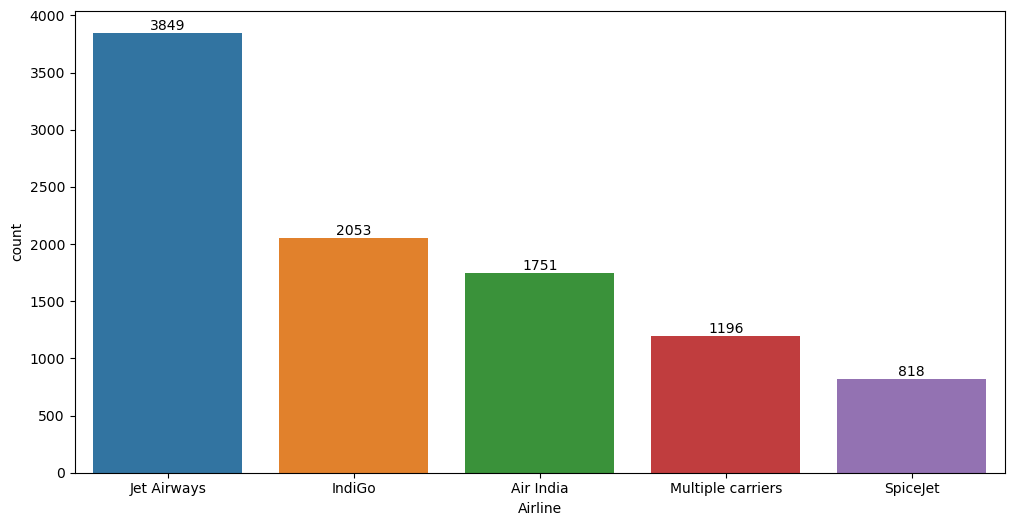

In [9]:
plt.figure(figsize=(12,6))
plot1=sns.countplot(x=data['Airline'],order=data['Airline'].value_counts().head(5).index)
plot1.bar_label(plot1.containers[0])
plt.show()

#  Distribution of Ticket Prices.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


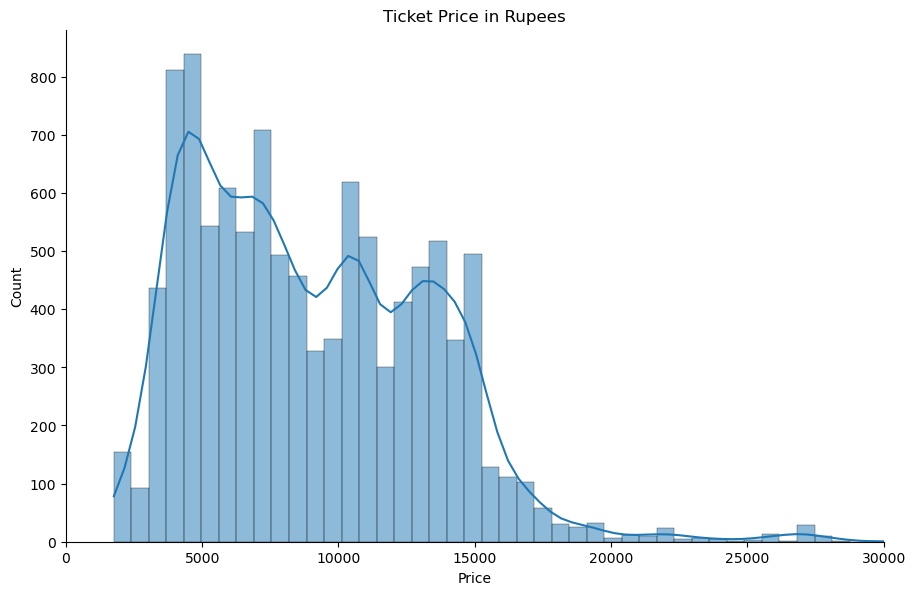

In [10]:
ticket_price = sns.displot(x=data['Price'], data=data, kde=True)
plt.title('Ticket Price in Rupees')
ticket_price.fig.set_figwidth(10)
ticket_price.fig.set_figheight(6)
ticket_price.set(xlim=(0, 30000))

# Airline vs Price

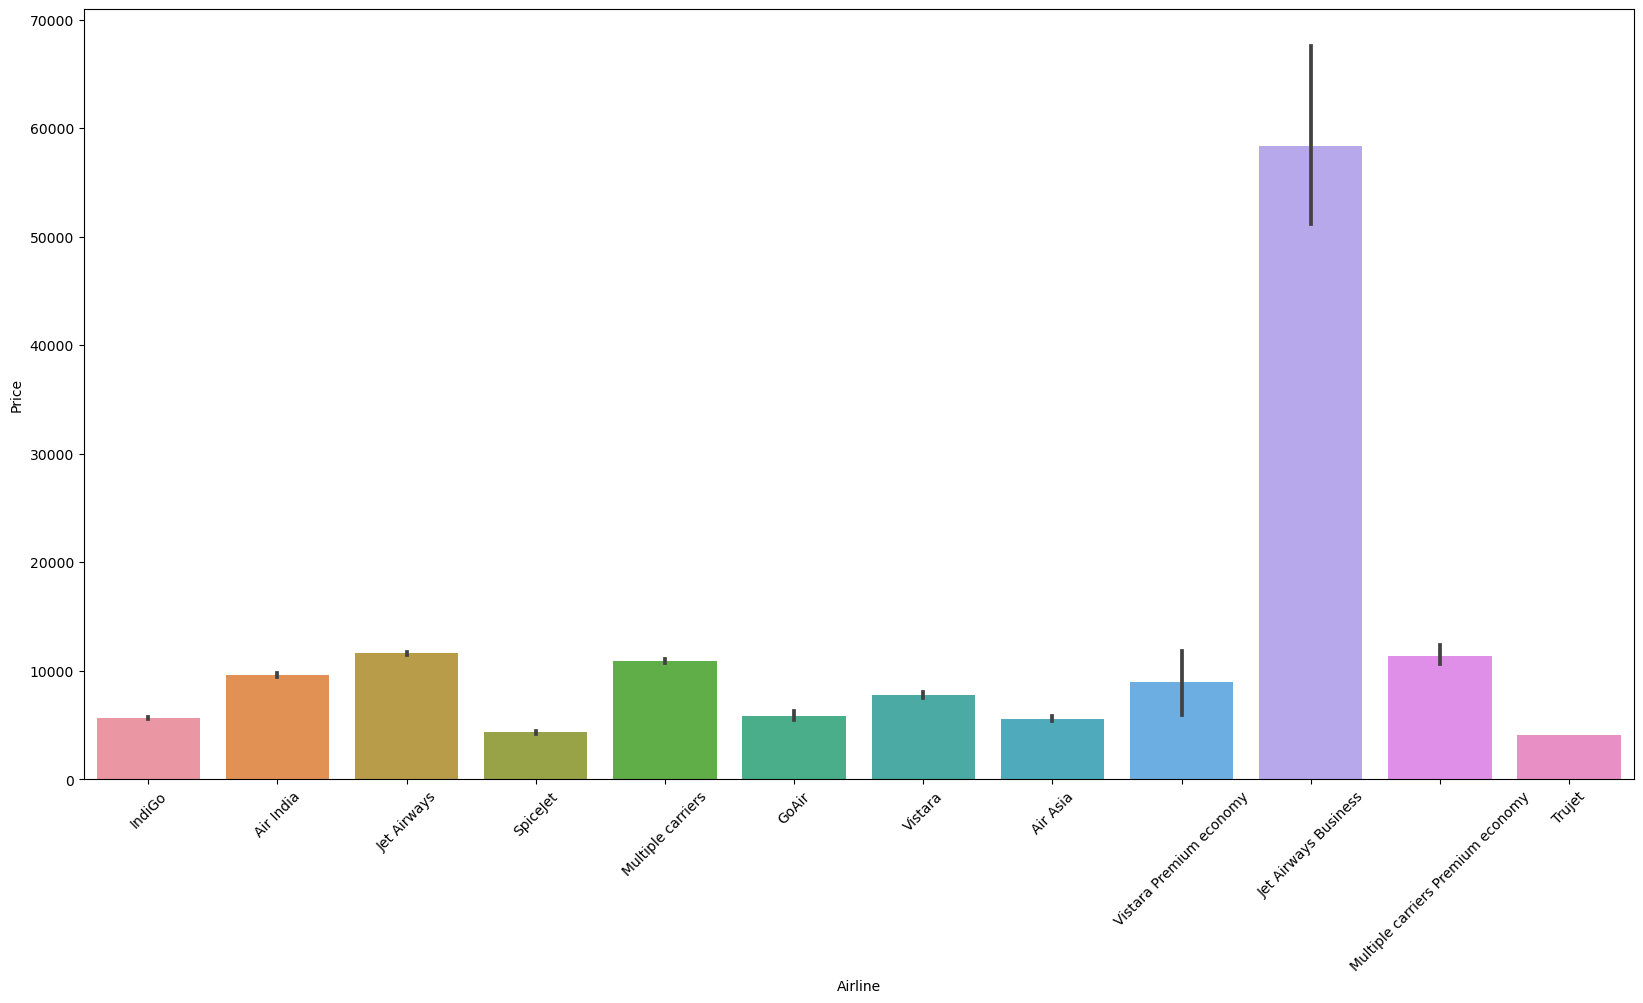

In [11]:
plt.figure(figsize=(20,10))
plot=sns.barplot(x=data['Airline'],y=data['Price'])
plt.setp(plot.get_xticklabels(), rotation=45)
plt.show()

# Source of City vs Prices

In [12]:
data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

<Axes: xlabel='Source', ylabel='Price'>

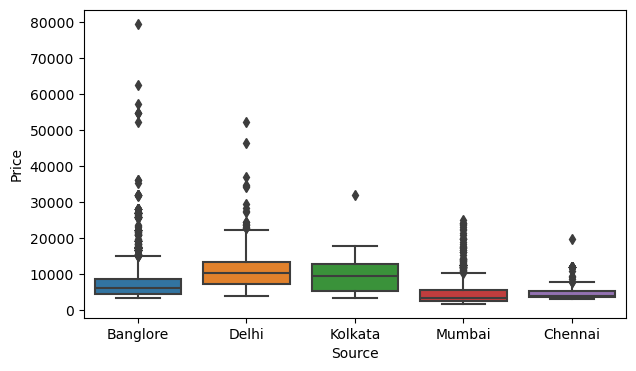

In [13]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Source',y='Price',data=data.sort_values('Price',ascending=False))

# Busiest Air Routes

In [14]:
data['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

# Airport with most no of flights

In [15]:
data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

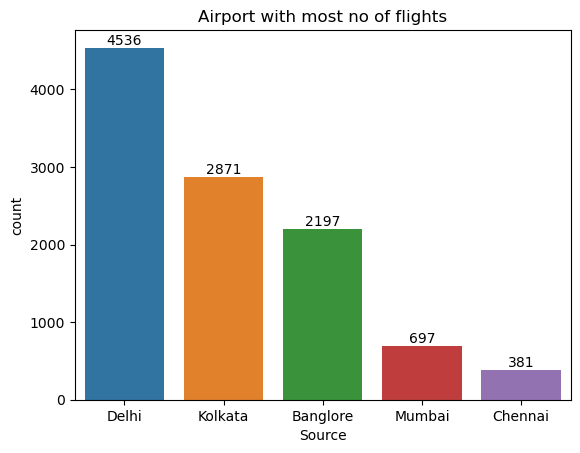

In [16]:
plot=sns.countplot(x=data['Source'],order=data['Source'].value_counts().index)
plt.title('Airport with most no of flights')
plot.bar_label(plot.containers[0])
plt.show()

# Peak Hour for Departure

In [17]:
#splitting Departure time into hour and min column :
data_new=data.copy()

data_new['dept_hour']=data['Dep_Time'].str.split(':').str[0]
data_new['dept_min']=data['Dep_Time'].str.split(':').str[1]

data_new['dept_hour']=data_new['dept_hour'].astype(int)
data_new['dept_min']=data_new['dept_min'].astype(int)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


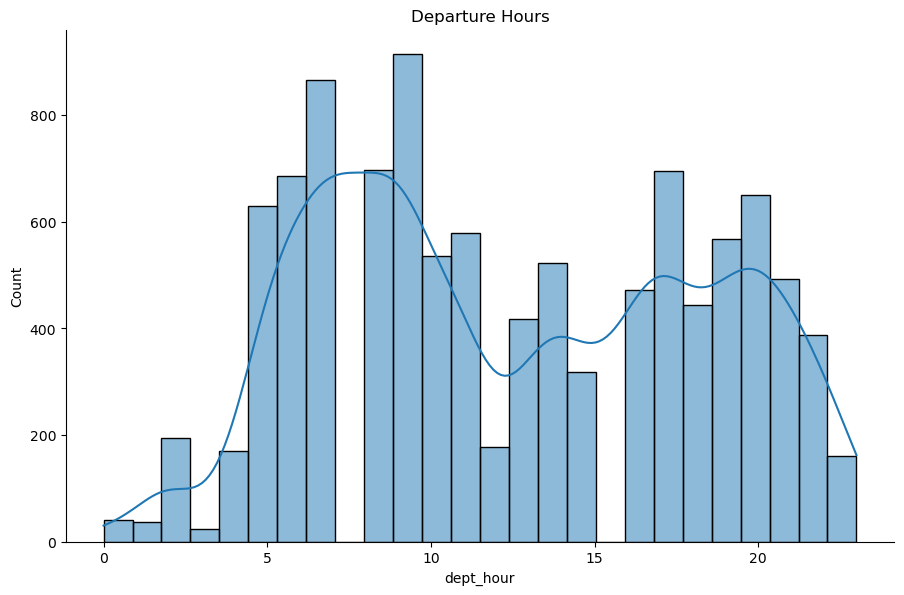

In [18]:
dept_hour=sns.displot(x=data_new['dept_hour'],kde=True)
plt.title('Departure Hours')
dept_hour.fig.set_figwidth(10)
dept_hour.fig.set_figheight(6)
plt.show()

# Heat Maps

In [19]:
# Create a pivot table with price, city, and airline as the rows and columns
pivot_table = data.pivot_table(values='Price', index='Destination', columns='Source')
pivot_table

Source,Banglore,Chennai,Delhi,Kolkata,Mumbai
Destination,,,,,
Banglore,NaN,NaN,NaN,9158.389411,NaN
Cochin,NaN,NaN,10540.113536,NaN,NaN
Delhi,5143.918577,NaN,NaN,NaN,NaN
Hyderabad,NaN,NaN,NaN,NaN,5059.708752
Kolkata,NaN,4789.892388,NaN,NaN,NaN
New Delhi,11917.716738,NaN,NaN,NaN,NaN


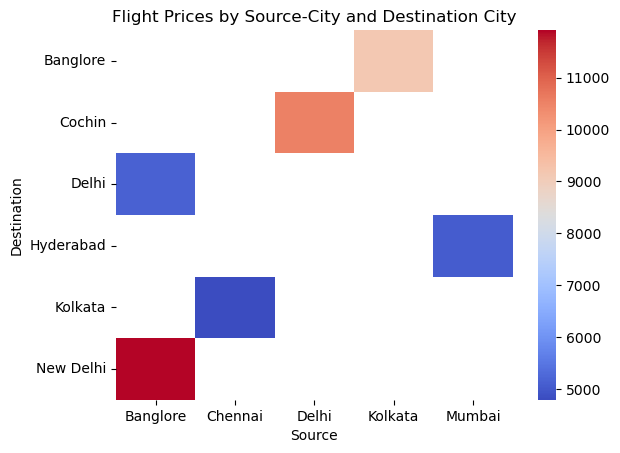

In [20]:
# Create a heatmap using the pivot table
sns.heatmap(pivot_table, cmap='coolwarm')

plt.title('Flight Prices by Source-City and Destination City')
plt.show()